### Kerry Gip

# Question 1  

From Canvas download wiki_labeled.zip ,  
and extract the contents. The wiki_labeled/ directory will contains 60327 facial images kept in  
100 folders, naming 00-99. Dimension of each image is 100 pixels by 100 pixels. Also,  
download the wiki_labeled.mat file,  
containing meta information of each of the 60327 images:    
ID: identification number of the subject (starting from 2002)  
• dob: the date of birth of the subject. (It is Matlab’s datenum value calculated based on total  
number of days since January 0, 0000.)  
• dob_str: the DD-MMM-YYYY format dob value.   
• photo_taken: when the photo was taken (only the year value)  
• full_path: directory path, including filename of the image  
• gender: Gender of the subject (0: female, 1: male, NaN if unknown)  
• name: name of the subject  
• face_location: location of the face.  
• face_score: detector score (the higher the better). Inf implies that no face was found in the  
image, and the face_location then just returns the entire image.  
• second_face_score: detector score of the face with the second highest score. This is useful to  
ignore images with more than one face. second_face_score is NaN (not a number) if no  
second face was detected.  
• age: age of the person (in years), and was calculated based on the “dob” value and the  
“photo_taken” values.  
Hint: To read/extract information from the mat file above, please use the loadmat library from  
scipy.io in python . [ from scipy.io import loadmat ]  

In [2]:
#libraries 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import statistics
from scipy.io import loadmat
from zipfile import *
from PIL import Image
from math import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier

In [3]:
#hold images 60327 count, 100x 100 size, made an empty array to hold the images as we play around  
tot = (9652, 10000)
hold = np.empty(tot)

#https://stackoverflow.com/questions/11105931/read-matlab-file-mat-from-zipped-file-without-extracting-to-directory-in-pyt

def load_images(hold, path):
    image_file = './wiki_labeled.zip'
    a = 0
    b = 1
    with ZipFile(image_file, 'r') as zip:
        for i in path:
            file = zip.open('wiki_labeled/' + i)
            img = Image.open(file)
            arr = np.array(img).flatten()
            hold[a:b, :] = arr
            a += 1
            b += 1
            
metaData = loadmat("wiki_labeled.mat",squeeze_me=True, struct_as_record=True)

#made the test size .84 since it would give the closest value to 10000,10000
#need to split it to get the full path and into all the folders 
path, x_nogo, y_age_trash, y_age_testyTrash  = train_test_split(metaData['wiki_labeled']['full_path'].item(0), metaData['wiki_labeled']['age'].item(0), test_size=0.84)


#make sure it runs 
load_images(hold, path)



In [4]:
age = pd.DataFrame(y_age_trash)

In [5]:
#metaData = metaData.to_frame()
metaData = loadmat("wiki_labeled.mat")

In [6]:
df = pd.DataFrame()
df["ID"] = metaData["wiki_labeled"]["ID"].item(0)[0]
df["dob"] = metaData["wiki_labeled"]["dob"].item(0)[0]
df["dob_str"] = metaData["wiki_labeled"]["dob_str"].item(0)[0]
df["photo_taken"] = metaData["wiki_labeled"]["photo_taken"].item(0)[0]
df["full_path"] = metaData["wiki_labeled"]["full_path"].item(0)[0]
df["gender"] = metaData["wiki_labeled"]["gender"].item(0)[0]
df["name"] = metaData["wiki_labeled"]["name"].item(0)[0]
df["face_location"] = metaData["wiki_labeled"]["face_location"].item(0)[0]
df["face_score"] = metaData["wiki_labeled"]["face_score"].item(0)[0]
df["second_face_score"] = metaData["wiki_labeled"]["second_face_score"].item(0)[0]
df["age"] = metaData["wiki_labeled"]["age"].item(0)[0]

In [7]:
df

,ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,2002,723671,[05-May-1981],2009,[17/10000217_1981-05-05_2009.png],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,27.746119
1,2003,711677,[03-Jul-1948],2008,[12/100012_1948-07-03_2008.png],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,59.582192
2,2004,705061,[23-May-1930],1961,[65/10001965_1930-05-23_1961.png],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,30.696804
3,2005,720044,[31-May-1971],2012,[16/10002116_1971-05-31_2012.png],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,40.672146
4,2006,716189,[09-Nov-1960],2012,[02/10002702_1960-11-09_2012.png],0.0,[Krista Tippett],"[[274.76563240288175, 57.7700900839337, 376.88...",4.748056,NaN,51.224201
...,...,...,...,...,...,...,...,...,...,...,...
60322,62324,707582,[17-Apr-1937],1963,[49/9996949_1937-04-17_1963.png],1.0,[Guus Haak],"[[128.92773553879837, 128.92773553879837, 320....",4.029268,NaN,25.791096
60323,62325,711338,[30-Jul-1947],1970,[32/9997032_1947-07-30_1970.png],1.0,[Nico Rijnders],"[[1, 1, 285, 440]]",-inf,NaN,22.510959
60324,62326,720620,[27-Dec-1972],2013,[09/9998109_1972-12-27_2013.png],1.0,[Michael Wiesinger],"[[169.88839785556354, 74.31669471981023, 235.2...",3.494303,NaN,40.097032
60325,62327,723893,[13-Dec-1981],2011,[00/9999400_1981-12-13_2011.png],1.0,[Johann Grugger],"[[1, 1, 1, 1]]",-inf,NaN,29.132648


# Question 2

Randomly split the dataset into 80% training and 20% test sets.  

In [8]:
X = df.iloc[:, df.columns != 'age']
Y = df.iloc[:, df.columns == 'age']

#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
X_age, X_age_test, y_age, y_age_test = train_test_split(hold ,age, test_size=0.2)

# Question 3


Compute the principal components (i.e., eigenfaces) from the training dataset by following the steps to compute principal components described in the “Backgrounds” section. Please note that: you can not call a library function to directly compute the principal components. For example: the PCA library in sklearn. However, you can use library functions to calculate the eigenvalues and eigenvectors of a square matrix.  

In [9]:
#standardize before 
#X_std = StandardScaler().fit_transform(X_train)
xSTD_age = StandardScaler().fit_transform(X_age)

In [10]:
#step 1: Obtain the 2D face images, I1, I2, ..., I m (the training faces). All faces must be of the same resolution.
#ACTUALLY JK LOL I don't understand whats happening in the description
#sooo https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/


#calculate means of each column
#mean = X_std.mean(axis = 0)
meanZip = xSTD_age.mean()
meanZip

-9.61206678729063e-18

In [11]:
#finding the center of each column
center = xSTD_age - meanZip
center

#centerTrans = center.T
#oh no, dont use transpose until later, just keep center 

array([[-0.27346672, -0.2721281 , -0.26857859, ...,  0.83379247,
         0.79472941,  0.8274914 ],
       [-0.99299885, -1.00686016, -0.99241574, ..., -0.58966576,
        -0.86220912, -0.84960897],
       [ 1.50707042,  1.51571992,  1.52261165, ..., -1.08979973,
        -1.11909881, -1.11845713],
       ...,
       [-1.09056253, -1.0925789 , -1.09056315, ..., -1.05132788,
        -1.05487639, -1.05444566],
       [-1.16373529, -1.1660521 , -1.16417371, ..., -1.07697578,
        -1.08056536, -1.05444566],
       [-0.91982609, -0.6639852 , -0.57528925, ..., -0.78202497,
         0.40939487,  1.92848859]])

In [12]:
#calculate covariance matrix of center

#this works https://districtdatalabs.silvrback.com/principal-component-analysis-with-python
cov = (np.dot(center.T,center))/(xSTD_age.shape[0]-1)
cov

covariance_mat = (xSTD_age - xSTD_age.mean()).T.dot((xSTD_age - xSTD_age.mean()) / (xSTD_age.shape[0] - 1))
print(covariance_mat)
#both equations give the same number

[[1.00012953 0.99109987 0.97693981 ... 0.35525911 0.35624497 0.35779228]
 [0.99109987 1.00012953 0.98955927 ... 0.35355614 0.35418117 0.35599962]
 [0.97693981 0.98955927 1.00012953 ... 0.35092474 0.35154051 0.35384337]
 ...
 [0.35525911 0.35355614 0.35092474 ... 1.00012953 0.97983437 0.94998566]
 [0.35624497 0.35418117 0.35154051 ... 0.97983437 1.00012953 0.98040198]
 [0.35779228 0.35599962 0.35384337 ... 0.94998566 0.98040198 1.00012953]]


In [13]:
print('NumPy covariance matrix: \n%s' %np.cov(xSTD_age.T))

NumPy covariance matrix: 
[[1.00012953 0.99109987 0.97693981 ... 0.35525911 0.35624497 0.35779228]
 [0.99109987 1.00012953 0.98955927 ... 0.35355614 0.35418117 0.35599962]
 [0.97693981 0.98955927 1.00012953 ... 0.35092474 0.35154051 0.35384337]
 ...
 [0.35525911 0.35355614 0.35092474 ... 1.00012953 0.97983437 0.94998566]
 [0.35624497 0.35418117 0.35154051 ... 0.97983437 1.00012953 0.98040198]
 [0.35779228 0.35599962 0.35384337 ... 0.94998566 0.98040198 1.00012953]]


In [14]:
#computer eiganvectors and eigan values
#An eigenface is the name given to a set of eigenvectors

values,vectors = np.linalg.eigh(covariance_mat)
print("\neiganvalues shape", values)
print("\neiganvectors/eigan faces shape", vectors)


eiganvalues shape [-7.05486378e-12 -1.13358839e-12 -7.58195498e-13 ...  5.47676290e+02
  7.63899966e+02  4.50522323e+03]

eiganvectors/eigan faces shape [[ 0.          0.          0.         ...  0.00561528  0.01421386
  -0.01014264]
 [-0.00850581 -0.01362211  0.00945846 ...  0.00574837  0.01424633
  -0.01015856]
 [ 0.01204806  0.00260872 -0.00841874 ...  0.00591314  0.01427427
  -0.01016358]
 ...
 [ 0.00113628 -0.01222129  0.00032452 ... -0.01727052  0.00304754
  -0.0083372 ]
 [ 0.00097726 -0.00101001 -0.00210525 ... -0.01723374  0.00311967
  -0.00831051]
 [ 0.00260354  0.01205555  0.00455433 ... -0.01702822  0.00326905
  -0.0083038 ]]


In [15]:
xSTD_age.shape

(7721, 10000)

In [14]:
#have to go back here and sort the vectors/values since its messing up the scree plot 
#orders need to be in descending order
#https://districtdatalabs.silvrback.com/principal-component-analysis-with-python
#also from the PCA Example done in class

eig_pairs = [(np.abs(values[i]), vectors[:,i]) for i in range(len(values))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

#sort them 
eig_pairs.sort(reverse=True)
#only keeping 20
faces = eig_pairs[:20]

Eigenvalues in descending order:
7.146988917846247e-12
1.3384449285169859e-12
9.479732686261407e-13
8.23076632210113e-13
8.223313685808218e-13
8.198216873430934e-13
8.179097040256235e-13
8.169584867806979e-13
8.116718488754444e-13
8.105928948092215e-13
8.104254900871257e-13
8.098257948457315e-13
8.088762479670532e-13
8.084253961105535e-13
8.075160866928706e-13
8.037430219327957e-13
8.023608841594392e-13
8.022858568578733e-13
8.008948418577957e-13
8.001990502207958e-13
7.997562809589588e-13
7.958798539204312e-13
7.943190008813717e-13
7.942204764181263e-13
7.939771696661694e-13
7.915355935060214e-13
7.90954825542717e-13
7.905578692801786e-13
7.893830703511218e-13
7.870471475995163e-13
7.862721005707355e-13
7.855540986111784e-13
7.810356465217693e-13
7.803393623584281e-13
7.796825937586565e-13
7.793486402065944e-13
7.790469851884439e-13
7.78996859752361e-13
7.785161098242419e-13
7.775599252899652e-13
7.753420255790726e-13
7.749633419862991e-13
7.74816328967084e-13
7.729513030793401e-13
7.

3.387087601673616e-13
3.3726077078580196e-13
3.3702509631813506e-13
3.3650496229198676e-13
3.348908968008037e-13
3.3450029894292226e-13
3.344051821889462e-13
3.3329505125709004e-13
3.3294956410540804e-13
3.3288754267782984e-13
3.32532288413328e-13
3.3243293696744806e-13
3.315659431334444e-13
3.311647637267052e-13
3.311397363746719e-13
3.310928979095799e-13
3.3104073107914963e-13
3.309691920373287e-13
3.307170558764961e-13
3.2966319283899804e-13
3.2956866253362235e-13
3.294442276541224e-13
3.290729610510961e-13
3.2906288640521415e-13
3.288964745974992e-13
3.2810421928891246e-13
3.275290603140275e-13
3.2694223520043355e-13
3.2690188604660265e-13
3.266440611242473e-13
3.2635272723918446e-13
3.262412321092672e-13
3.2592561003277867e-13
3.259197592327357e-13
3.252823146138732e-13
3.251776162895718e-13
3.248722174977819e-13
3.247444002420885e-13
3.2403751296860224e-13
3.2348934986391707e-13
3.230434757171714e-13
3.2287839046557877e-13
3.226162862127673e-13
3.2059443721722175e-13
3.2056860436

0.000704013957062225
0.0007045826971499314
0.0007063851639475235
0.0007074430383433093
0.0007086171890879991
0.0007105041278639492
0.0007111458860502815
0.0007138916543466429
0.0007148064514824685
0.0007149913183767146
0.0007172241668318165
0.0007184052140425171
0.0007209649913385435
0.0007217328233369945
0.0007235831010837733
0.0007273664488456526
0.0007283951051325684
0.0007285986901027437
0.000729270084035291
0.0007306960514619504
0.0007330432923401
0.0007348360036172875
0.0007353799790853161
0.0007363160011976221
0.0007400126583141491
0.0007400429059718431
0.0007410839708998562
0.0007416604631671033
0.0007437682225367014
0.0007459142706220278
0.0007469379164552155
0.000747424243300397
0.0007487417330652097
0.0007509930770588407
0.0007532417830387228
0.000753853987461856
0.0007555885398439165
0.0007576292416883426
0.0007588778963619837
0.0007591783223526563
0.0007610683913958255
0.0007615847174729199
0.00076417991078037
0.0007659753678568745
0.0007661897159055121
0.00076873413499638

0.05660606465550661
0.05664704586130615
0.056718116578052626
0.0567791248948804
0.05685642172841488
0.05688223372040405
0.05698125949961666
0.05705174301099879
0.05712135900042912
0.05714132554117987
0.05716755000605949
0.057262996167088465
0.05730767541457072
0.05739597732033932
0.057465033752096786
0.05750407011398175
0.05757966557130766
0.05765150989940796
0.05772232563612974
0.05780326050442353
0.05782762280378271
0.057967687733726916
0.058018729557796085
0.05802772308346862
0.05813941692384679
0.05815003579773077
0.0581632392182721
0.05821567996984776
0.0582770107386994
0.058390140531775735
0.058400498156592914
0.0585070481930427
0.05852868149010824
0.058571266657917426
0.05876102516392712
0.05881467308780328
0.05883884674923333
0.05888000211357698
0.059005031077000836
0.059039350563042985
0.059094984798494746
0.05914577192126211
0.059246329674165155
0.0592564047755822
0.0593750251116517
0.05941951414131225
0.059441364198451946
0.059490835341040764
0.05956178344018378
0.0596053645

In [15]:
#tbreaking down the eigpairs into separate parts  and sorting them manually in reverse order
index= values.argsort()[::-1]
eig_vals = values[index]
eig_vecs = vectors[:, index]
eig_faces = eig_vecs[:20]

# Question 4


Draw a scree-plot to choose a best value for K that denotes how many principal components to
retain.

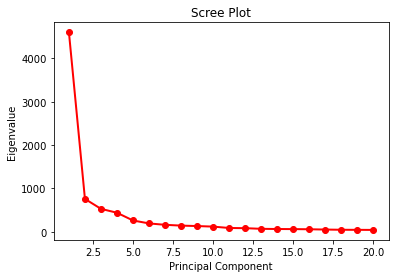

In [16]:
#https://stats.stackexchange.com/questions/12819/how-to-draw-a-scree-plot-in-python
#fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(20) + 1
plt.plot(sing_vals, eig_vals[:20], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [17]:
#from PCA SAMPLE done in class 

tot = sum(values)
var_exp = [(i / tot)*100 for i in sorted(values, reverse=True)]
len(var_exp)


10000

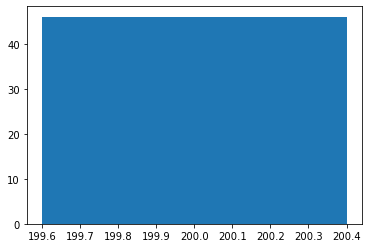

In [18]:
#the so called "Scree- Plot"
plt.figure()
plt.bar(200, var_exp)
#plt.xticks(np.arange(10000))
plt.show()

In [19]:
k = 20

# Question 5

Show the top 20 ghosts (i.e., eigenfaces) in a 10x10 grid.

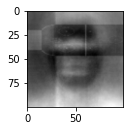

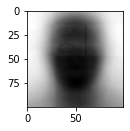

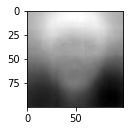

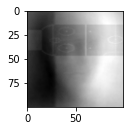

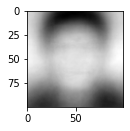

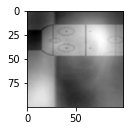

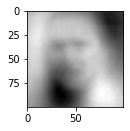

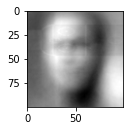

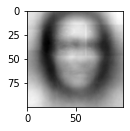

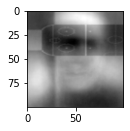

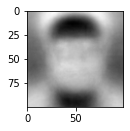

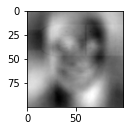

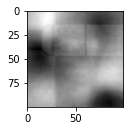

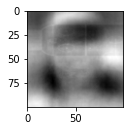

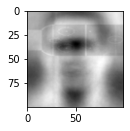

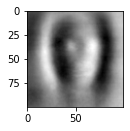

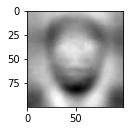

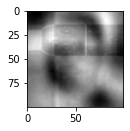

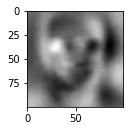

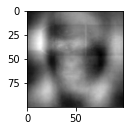

In [20]:
# Show the top 20 ghosts (i.e., eigenfaces) in a 10x10 grid
#https://medium.com/@sebastiannorena/pca-principal-components-analysis-applied-to-images-of-faces-d2fc2c083371
#https://stackoverflow.com/questions/62891873/how-to-show-an-image-after-pca
#https://github.com/lychengr3x/Face-Recognition-Using-Eigenfaces/blob/master/face_recognition.ipynb


#can bring it down to 100,100

#fig, axs = plt.subplots(4,5,figsize=(15,5))
ghost_image = []
for i in range(0,20):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(4,5,i+1)
    ax.imshow(eig_vecs[:,i].reshape(100,100), cmap='gray')
    #ghost_image.append(Image.fromarray(abs(faces[i]).reshape(100,100).astype('uint8')))
    #plt.show()
    
    
    
#trying to make this into a nice 4x5 grid, but its just showing 20x1
#need to somehow filter these by the matching of DF face scores metaData

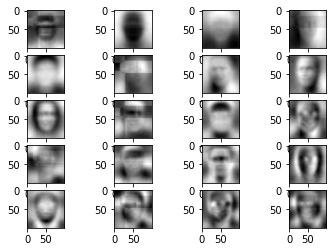

In [21]:
# this is in the nice 5x4 grid 

fig = plt.figure()
for i in range(1,20+1):
    fig.add_subplot(5,4,i)
    img = np.reshape(eig_vecs[:,i-1], (100,100) )
    plt.imshow(img, cmap='gray')

# Question 6

Considering the chosen K value above, project the training and test images on to the eigenfaces
to reduce the dimensionality.

In [22]:
#https://github.com/ranriy/Face-Recognition-using-Eigenfaces/blob/master/Wasnik_04_01.ipynb
#tried to do it like the example, but that wasnt happening 

reconstruct_train_mean = np.mean(X_age)
reconstruct_test_mean = np.mean(X_age_test)

#subtract mean from original 
reconstruct_center_train = X_age - reconstruct_train_mean
reconstruct_center_test = X_age_test - reconstruct_test_mean

# #standardize them
scaler = StandardScaler()
standard_train = scaler.fit_transform(reconstruct_center_train)
standard_test = scaler.fit_transform(reconstruct_center_test)

# Question 7

Perform Stochastic gradient descent (SGD) based linear regression on the training dataset to  
learn “age”. Please do a trial-and-error search to tune the hyper-parameters of the SGD based  
linear regression (e.g., number of epochs, learning rate), and make a note why you select a  
specific set of hyper-parameters. You are allowed to use scikit-learn library to do the regression.  

In [23]:
#choosing alpha=0.01,nEpoch=50, nIteration=100 since we did that for hw2 and initializing beta to some random number
epoch = 50
alpha = 0.0001
iteration = 1
#beta = np.random.randn(len(standard_train[0]), 1)
beta = np.zeros((1,standard_train.shape[1]))
#transposing beta for idk why 
beta = beta.T

In [24]:
#https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

def SGD(X, y, beta, alpha, iteration):
    m = len(y)
    for it in range(iteration):
        prediction = np.dot(X, beta)
        
        rand_ind = np.random.randint(0, m)
        X_i = X[rand_ind,:].reshape(1, X.shape[1])
        y_i = y[rand_ind].reshape(1, 1)
        prediction = np.dot(X_i, beta)
        
        beta = beta - (1/m) * alpha * (X.T.dot(prediction-y))
        
    return beta

In [25]:
y = y_age.values

In [26]:
betas = SGD(xSTD_age, y, beta, alpha, iteration)
betas 
#standard_train - used first
#then used xSTD_age
#then changed to 5 iterations 



array([[-1.01569838e-04],
       [-9.93032591e-05],
       [-9.69483830e-05],
       ...,
       [-2.02545524e-04],
       [-2.04869122e-04],
       [-1.99551955e-04]])

# Question 8

Predict the test dataset (from step 2) based on the learned model in step 7, and report Root
Mean Square Error (RMSE).

In [27]:
def prediction(betas, X_test):
    y_pred = []
    #https://towardsdatascience.com/normal-equation-in-python-the-closed-form-solution-for-linear-regression-13df33f9ad71
    #@TODO: Your code goes here

    
    # Appending a cloumn of ones in X to add the bias term.
    X_test = np.append(X_test, np.ones((X_test.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and theta.
    y_pred.append(np.dot(X_test, betas))
    
    return y_pred

In [28]:
X_age_test

array([[217., 217., 217., ..., 173., 173., 173.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 15.,  15.,  14., ..., 145., 143., 145.],
       ...,
       [102., 101., 100., ...,  96.,  99.,  99.],
       [167., 150., 122., ..., 142., 112.,  97.],
       [ 99., 100., 104., ...,  74.,  67.,  41.]])

In [29]:
#to make it 10000x 10000
#messed up and used the unstandardized test one
#dropped one column to make it fit 

X_age_test = pd.DataFrame(X_age_test)
X_age_dumb = X_age_test.drop(columns=X_age_test.columns[9999])


standard_test = pd.DataFrame(standard_test)
standard_test_dum= standard_test.drop(columns=standard_test.columns[9999])

predict = prediction(betas,standard_test_dum  ) 
predict= [item for sublist in predict for item in sublist]
predict= [item for sublist in predict for item in sublist]
predict

[-0.6373110669899342,
 0.6254267298080718,
 -0.1131237892827397,
 -0.17502888750155451,
 -0.4969972357502326,
 -1.0852056090642632,
 -0.047785433668328735,
 -0.21497178629334185,
 0.6254267298080718,
 0.411142138655867,
 0.4154511661499632,
 -0.4853737623367843,
 -0.1273010129185735,
 -0.6846766872766646,
 -0.6523357675996517,
 0.055262004733481626,
 0.33925230770223724,
 0.6254267298080718,
 0.2156576818783763,
 -0.5068320867512528,
 -0.15611369227341249,
 0.15520086249087311,
 0.6254267298080718,
 -0.3628205472512185,
 -0.5161862574130096,
 0.10505843596228935,
 -0.0626905240654641,
 0.3923085634150145,
 0.15566622024807508,
 0.10513068810854263,
 0.6254267298080718,
 -1.0006389744516428,
 -0.03254065423106786,
 0.1553963586769853,
 -0.5513804454013577,
 0.35935792601638084,
 -0.10327355673396083,
 0.6254267298080718,
 0.6254267298080718,
 -0.19591511022994487,
 0.06437337300933095,
 -0.5893055265782505,
 0.048710793576389654,
 0.6254267298080718,
 0.3447499008653987,
 0.209077575468

In [30]:
rmse = sqrt(mean_squared_error(y_age_test, predict))

print("RMSE:", rmse)

RMSE: 42.879588103882895


# Question 9

From Canvas, Download the wiki_judge_images.zip:  
containing 2001 facial images of resolution 100x100
You can obtain another meta file, wiki_ judgeX.mat from Canvas containing some information about the images   
However the information does not include the "age" field.  
Using your best regression model, predict the age of each of those 2001 facial images and prepare a #### submission.csv  
in the format: 

ID,age
1,38.8
2,25
etc.

Submit submission.csv along with jupyter notebook

In [31]:
def load_Jimages(hold, path):
    image_file = './wiki_judge_images.zip'
    a = 0
    b = 1
    with ZipFile(image_file, 'r') as zip:
        for i in path:
            file = zip.open('wiki_judge_images/' +  i)
            img = Image.open(file)
            arr = np.array(img).flatten()
            hold[a:b, :] = arr
            a += 1
            b += 1
            


Jtot = (2001,10000)
Jhold = np.empty(Jtot)


Jmeta = loadmat('wiki_judgeX.mat', squeeze_me=True, struct_as_record=True)
Jpath = Jmeta['wiki_judgeX']['full_path'].item(0)
#make sure it runs 
load_Jimages(Jhold, Jpath)

In [32]:
J_df = pd.DataFrame(data=Jmeta['wiki_judgeX']['ID'].item(0),columns=['ID'],index=None)
#J_df["ID"] = ["wiki_judgeX"]["ID"].item(0)[0]


In [33]:
J_df

,ID
0,1
1,2
2,3
3,4
4,5
...,...
1996,1997
1997,1998
1998,1999
1999,2000


In [34]:
#std
jSTD = StandardScaler().fit_transform(Jhold)

jSTD = np.delete(jSTD, obj= 1, axis=0)

In [35]:
jMean = jSTD.mean()
jMean

-0.0002159668025068552

In [36]:
jCenter = jSTD - jMean
jCenter

array([[-0.13098819,  0.09202401,  0.2256037 , ..., -0.56832295,
        -0.33270845, -0.1900703 ],
       [ 1.59704614,  1.60402313,  1.58928435, ...,  1.70334037,
         1.72344849,  1.72535441],
       [-0.67860471, -0.67616909, -0.68757531, ...,  0.90695265,
         1.00313874,  1.01690965],
       ...,
       [-0.28918852, -0.31036285, -0.37100659, ..., -0.30721223,
        -0.31961191, -0.4130992 ],
       [-0.93415908, -0.944427  , -0.94326543, ...,  0.26723137,
         0.16496011,  0.0591973 ],
       [ 0.03938139,  0.04324984,  0.03079218, ...,  0.20195369,
         0.28282898,  0.07231665]])

In [37]:
jSTD_df= pd.DataFrame(jSTD)
jDrop = jSTD_df.drop(columns=jSTD_df.columns[9999])

In [38]:
jPred = prediction(betas, jDrop)
jPred

[array([[ 0.24663839],
        [-0.95130908],
        [-0.43214269],
        ...,
        [ 0.16289598],
        [-0.10574042],
        [ 0.01504039]])]

In [39]:
jPred = [item for sublist in jPred  for item in sublist]
jPred = [item for sublist in jPred  for item in sublist]

In [40]:
jPred.append(0)
J_df["Age"] = jPred

In [41]:
J_df

,ID,Age
0,1,0.246638
1,2,-0.951309
2,3,-0.432143
3,4,-0.302522
4,5,-0.507931
...,...,...
1996,1997,-0.279462
1997,1998,0.162896
1998,1999,-0.105740
1999,2000,0.015040


In [42]:
judgeSubmission = J_df.to_csv("judgeSubmission.csv", index = None, header = True)

# Question 10

Repeat steps 2-8 four more times, and report average RMSE and standard deviation of the  
RMSE. Please make sure in step 2 you are actually randomly shuffling the dataset before  
splitting it every time.  

In [43]:
rmseList = [45.39144949628948, 43.66786474106938, 43.44448989143501, 42.79172908668706]
# rmse1 alpha = 0.01 iteration = 1
# rmse2 alpha = 0.001 iteration = 5
# rmse3 alpha = 0.0001 iteration = 5
# rmse4 alpha = 0.01 iteration = 1


avgRmse = statistics.mean(rmseList)
stdevRmse = statistics.stdev(rmseList)

print("Avg RMSE = ", avgRmse)
print("Standard Deviation RMSE =", stdevRmse)

Avg RMSE =  43.82388330387023
Standard Deviation RMSE = 1.1091869768742735


# Question 11

Draw a plot (K vs RMSE) after experimenting with steps 2-8 by varying values of K. The  
maximum value K can take is 100x100 = 10000, so please draw the plot for the K values from  
the set {2, 10, 20, 40, 50, 60, 80, 100, 200}.  

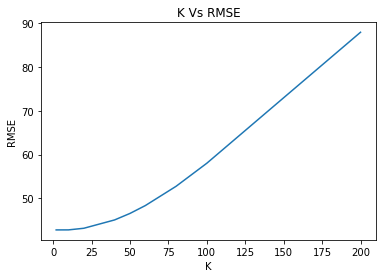

In [46]:
plt.plot([2, 10, 20, 40, 50, 60, 80, 100, 200], [42.77431042056693,42.78097335061645, 43.152732121626975,45.057352332145804,
                                                 46.542723384763505,48.342421312366504, 52.7506624322251, 58.02665822940155,
                                                 87.99128318449861])
plt.title('K Vs RMSE')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

In [45]:
#for number 11

betas = SGD(xSTD_age, y, beta, alpha, 200)


predict = prediction(betas,standard_test_dum  ) 
predict= [item for sublist in predict for item in sublist]
predict= [item for sublist in predict for item in sublist]


rmse = sqrt(mean_squared_error(y_age_test, predict))
print("RMSE:", rmse)

RMSE: 87.99128318449861
